# Projections

## Introduction

In [ ]:
# %pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 54.2 MB/s eta 0:00:00


In [1]:
import pandas as pd
import geopandas as gpd
import pyproj
from pyproj import CRS
import matplotlib.pyplot as plt

ModuleNotFoundError: ignored

defining paths

In [ ]:
mainpath="/content/drive"
inpath=mainpath+"/MyDrive/GIS_Research_2023"

In [2]:
from google.colab import drive
drive.mount(mainpath)

NameError: ignored

In [ ]:
world=gpd.read_file(inpath+'/2/data/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')

In [ ]:
world.columns

Index(['ne_10m_adm', 'ScaleRank', 'LabelRank', 'FeatureCla', 'OID_',
       'SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3',
       'GEOU_DIF', 'GEOUNIT', 'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'NAME',
       'ABBREV', 'POSTAL', 'NAME_FORMA', 'TERR_', 'NAME_SORT', 'MAP_COLOR',
       'POP_EST', 'GDP_MD_EST', 'FIPS_10_', 'ISO_A2', 'ISO_A3', 'ISO_N3',
       'geometry'],
      dtype='object')

In [ ]:
world.shape

(253, 32)

In [ ]:
world.drop_duplicates(subset='ne_10m_adm').shape

(253, 32)

In [ ]:
world=world[['ne_10m_adm','ADMIN','geometry']].copy()
world.columns=['iso','country','geometry']

<Axes: >

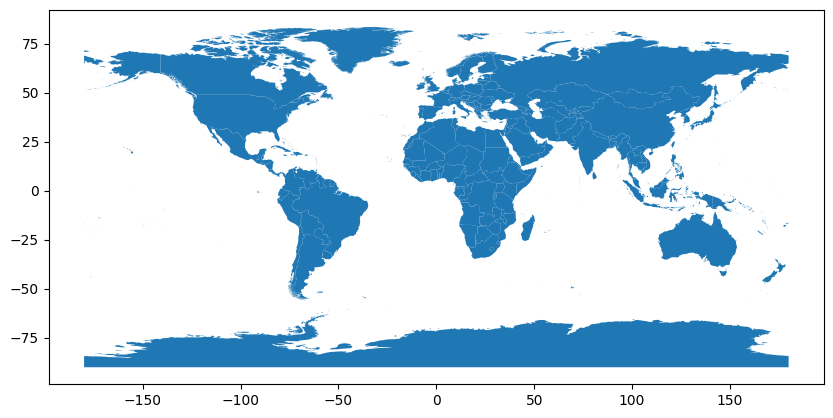

In [ ]:
world.plot(figsize=(10,6))

In [ ]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
world.head()

,iso,country,geometry
0,ABW,Aruba,"POLYGON ((-69.87609 12.42720, -69.88738 12.417..."
1,AFG,Afghanistan,"POLYGON ((71.02458 38.44192, 71.03296 38.42365..."
2,AGO,Angola,"MULTIPOLYGON (((11.74148 -16.72017, 11.78024 -..."
3,AIA,Anguilla,"MULTIPOLYGON (((-63.03690 18.21277, -63.09881 ..."
4,ALB,Albania,"POLYGON ((20.06496 42.54676, 20.08563 42.53001..."


## Pick a new projection

- List of available projections here: https://techoverflow.net/2019/06/22/how-to-list-available-projections-in-pyproj/

- Another exhaustive list: https://developers.arcgis.com/rest/services-reference/using-spatial-references.htm

- Choose wisely! https://xkcd.com/977/

- Some equal area projections: https://en.wikipedia.org/wiki/Equal-area_map

## Calculate area  of countries

### 1. World cylindrical equal area projection

In [ ]:
wcea_crs=CRS.from_string('esri:54034')

In [ ]:
wcea_crs

<Derived Projected CRS: ESRI:54034>
Name: World_Cylindrical_Equal_Area
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Cylindrical_Equal_Area
- method: Lambert Cylindrical Equal Area
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
world_cea=world.to_crs(crs=wcea_crs)

<AxesSubplot:>

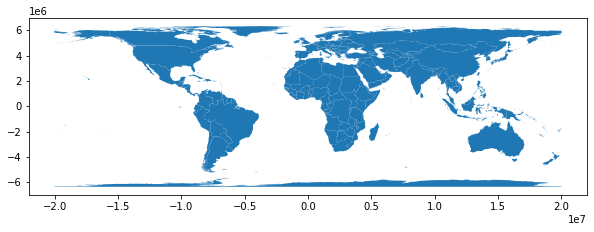

In [ ]:
world_cea.plot(figsize=(10,6))

In [ ]:
world_cea.crs

<Derived Projected CRS: ESRI:54034>
Name: World_Cylindrical_Equal_Area
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Cylindrical_Equal_Area
- method: Lambert Cylindrical Equal Area
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

**Now we can calculate areas!**

In [ ]:
world_cea['area_sqkm_cea']=world_cea['geometry'].area /10**6

In [ ]:
world_cea.head()

,iso,country,geometry,area_sqkm_cea
0,ABW,Aruba,"POLYGON ((-7778570.967 1363661.939, -7779827.9...",1.697625e+02
1,AFG,Afghanistan,"POLYGON ((7906420.546 3945686.255, 7907352.466...",6.421811e+05
2,AGO,Angola,"MULTIPOLYGON (((1307056.066 -1823364.546, 1311...",1.244785e+06
3,AIA,Anguilla,"MULTIPOLYGON (((-7017235.268 1980983.551, -702...",8.217755e+01
4,ALB,Albania,"POLYGON ((2233620.650 4292737.291, 2235921.688...",2.832650e+04


*Note* how the polygon definitions have changed

In [ ]:
world_cea[world_cea.iso=='CHE']

,iso,country,geometry,area_sqkm_cea
39,CHE,Switzerland,"POLYGON ((1032289.160 4693622.852, 1062823.930...",41431.973026


https://en.wikipedia.org/wiki/Switzerland

not too bad...

We can also identify projections by (European Petroleum Survey Group) EPSG numbers for the purposes of `to_crs()`. For instance, we can get *almost* the same projection as follows:

In [ ]:
world_lcea=world.to_crs(epsg=3410)
world_lcea.crs

<Derived Projected CRS: EPSG:3410>
Name: NSIDC EASE-Grid Global
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 86°S and 86°N.
- bounds: (-180.0, -86.0, 180.0, 86.0)
Coordinate Operation:
- name: US NSIDC Equal Area global projection
- method: Lambert Cylindrical Equal Area (Spherical)
Datum: Not specified (based on International 1924 Authalic Sphere)
- Ellipsoid: International 1924 Authalic Sphere
- Prime Meridian: Greenwich

In [ ]:
world_lcea['area_sqkm_cea']=world_lcea['geometry'].area /10**6
world_lcea[world_lcea.iso=='CHE']

,iso,country,geometry,area_sqkm_cea
39,CHE,Switzerland,"POLYGON ((893020.240 5437047.642, 919435.481 5...",41325.336064


We can also get a bit more concise information on the crs...

In [ ]:
print(world_lcea.crs)

EPSG:3410


In [ ]:
print(world_cea.crs)

esri:54034


In [ ]:
print(world.crs)

EPSG:4326


`geopandas` uses `pyproj` (we used `pyproj.CRS` above to deinfe a crs from a string) to handle coordinate reference systems. `pyproj` is a wrapper around `PROJ` (see here: https://proj.org/)

suppose we wanted to get the EPSG code for some projection

In [ ]:
CRS.from_string('esri:54034').to_epsg()

there seems no exact match, but we can set the `min_confidence` parameter to get the closest match

In [ ]:
CRS.from_string('esri:54034').to_epsg(min_confidence=25)

6933

In [ ]:
world_lcea=world.to_crs(epsg=6933)
world_lcea.crs

<Derived Projected CRS: EPSG:6933>
Name: WGS 84 / NSIDC EASE-Grid 2.0 Global
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 86°S and 86°N.
- bounds: (-180.0, -86.0, 180.0, 86.0)
Coordinate Operation:
- name: US NSIDC EASE-Grid 2.0 Global
- method: Lambert Cylindrical Equal Area
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
world_lcea['area_sqkm_cea']=world_lcea['geometry'].area /10**6
world_lcea[world_lcea.iso=='CHE']

,iso,country,geometry,area_sqkm_cea
39,CHE,Switzerland,"POLYGON ((894737.665 5415191.720, 921203.707 5...",41431.973026


### 2. World sinusoidal projection

In [ ]:
wsea_crs=CRS.from_string('esri:54008')
world_sea=world.to_crs(crs=wsea_crs)

<AxesSubplot:>

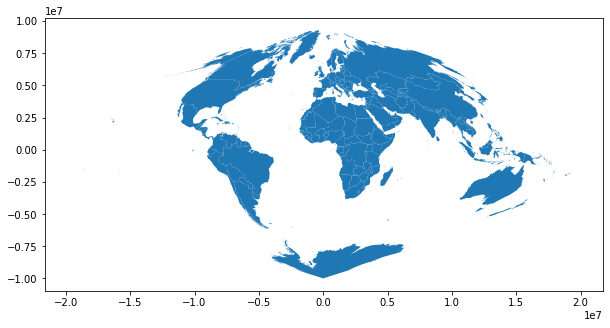

In [ ]:
world_sea.plot(figsize=(10, 6))

In [ ]:
world_sea['area_sqkm_sea']=world_sea['geometry'].area / 10**6

In [ ]:
world_sea.head()

,iso,country,geometry,area_sqkm_sea
0,ABW,Aruba,"POLYGON ((-7597498.562 1374343.176, -7599006.7...",1.697644e+02
1,AFG,Afghanistan,"POLYGON ((6200643.078 4256551.236, 6202936.616...",6.421813e+05
2,AGO,Angola,"MULTIPOLYGON (((1252142.373 -1849338.664, 1255...",1.244785e+06
3,AIA,Anguilla,"MULTIPOLYGON (((-6667869.464 2014531.151, -667...",8.217720e+01
4,ALB,Albania,"POLYGON ((1648090.114 4712370.004, 1650228.758...",2.832656e+04


### 3. Eckert II

In [ ]:
eckert_crs=CRS.from_string('esri:54014')
world_eckert=world.to_crs(crs=eckert_crs)

<AxesSubplot:>

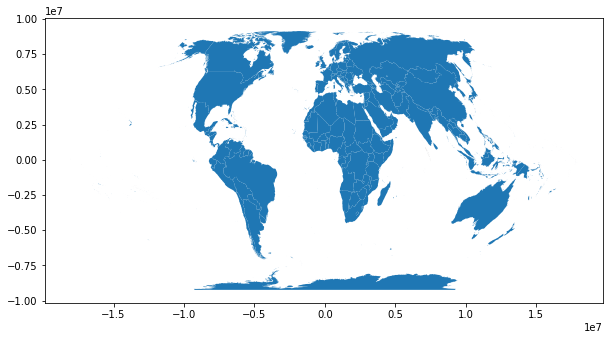

In [ ]:
world_eckert.plot(figsize=(10, 6))

In [ ]:
world_eckert['area_sqkm_eckert2']=world_eckert['geometry'].area / 10**6

In [ ]:
world_eckert.head()

,iso,country,geometry,area_sqkm_eckert2
0,ABW,Aruba,"POLYGON ((-6562765.334 1555304.567, -6564309.2...",1.707999e+02
1,AFG,Afghanistan,"POLYGON ((5321593.706 4974217.265, 5323154.833...",6.438309e+05
2,AGO,Angola,"MULTIPOLYGON (((1066410.664 -2112559.801, 1069...",1.252371e+06
3,AIA,Anguilla,"MULTIPOLYGON (((-5656836.355 2307982.369, -566...",8.262123e+01
4,ALB,Albania,"POLYGON ((1444704.353 5500664.648, 1446429.572...",2.835244e+04


## Comparing areas across projections

In [ ]:
world_cea=world_cea[['iso','area_sqkm_cea']].copy()
world_sea=world_sea[['iso','area_sqkm_sea']].copy()
world_eckert=world_eckert[['iso','area_sqkm_eckert2']].copy()
df=pd.merge(world_cea,world_sea,on='iso',how='inner')
df=pd.merge(df.copy(),world_eckert,on='iso',how='inner')

In [ ]:
df.head()

,iso,area_sqkm_cea,area_sqkm_sea,area_sqkm_eckert2
0,ABW,1.697625e+02,1.697644e+02,1.707999e+02
1,AFG,6.421811e+05,6.421813e+05,6.438309e+05
2,AGO,1.244785e+06,1.244785e+06,1.252371e+06
3,AIA,8.217755e+01,8.217720e+01,8.262123e+01
4,ALB,2.832650e+04,2.832656e+04,2.835244e+04


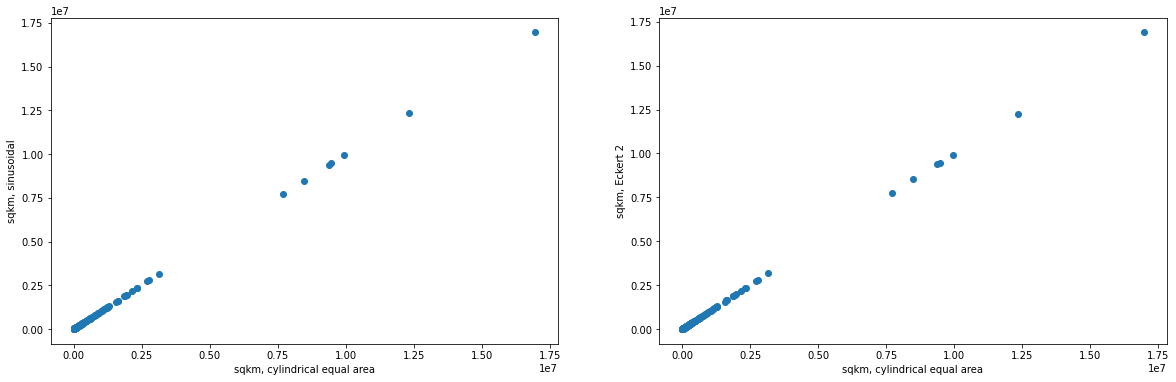

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].scatter(df.area_sqkm_cea, df.area_sqkm_sea)
ax[0].set_xlabel('sqkm, cylindrical equal area')
ax[0].set_ylabel('sqkm, sinusoidal')

ax[1].scatter(df.area_sqkm_cea, df.area_sqkm_eckert2)
ax[1].set_xlabel('sqkm, cylindrical equal area')
ax[1].set_ylabel('sqkm, Eckert 2')

plt.show()